**1.What is unsupervised learning in the context of machine learning**

Unsupervised learning is a type of machine learning where the model is trained on data that has no labels.

**2.How does K-Means clustering algorithm work**

K-Means clustering works by repeatedly assigning data points to the nearest cluster center and then updating those centers until the clusters stabilize.

**3. Explain the concept of a dendrogram in hierarchical clustering**

A dendrogram is a tree-like diagram in hierarchical clustering that shows how data points merge into clusters at different distance levels.

**4 What is the main difference between K-Means and Hierarchical Clustering**

K-Means requires you to predefine the number of clusters, while Hierarchical Clustering builds a tree of clusters without needing a preset number.

**5 What are the advantages of DBSCAN over K-Means**

DBSCAN can find clusters of any shape, handles noise/outliers well, and doesn’t require specifying the number of clusters, unlike K-Means.

**6 When would you use Silhouette Score in clustering **

Silhouette Score to measure how well your clustering algorithm has separated the data — it tells you how good the cluster quality is and helps choose the optimal number of clusters.

**7 What are the limitations of Hierarchical Clustering **

Hierarchical clustering is slow for large datasets, sensitive to noise, and cannot undo incorrect merges.

**8 Why is feature scaling important in clustering algorithms like K-Mean **

Because K-Means relies on distance calculations, feature scaling ensures all features contribute equally to the clustering.

**9 How does DBSCAN identify noise points**
DBSCAN marks points as noise if they have too few neighbors within the specified distance (eps).

**10 Define inertia in the context of K-Means**

Inertia is the sum of squared distances between data points and their assigned cluster centers, measuring how compact the clusters are.

**11 What is the elbow method in K-Means clustering**

The elbow method identifies the optimal number of clusters by finding the point where adding more clusters stops significantly reducing inertia.

**12  Describe the concept of "density" in DBSCAN**

In DBSCAN, “density” refers to how many data points lie within a specified distance (eps) around a point.

**13  Can hierarchical clustering be used on categorical data**

Yes, hierarchical clustering can be used on categorical data if an appropriate distance metric (like Hamming or Jaccard) is used.

**14 What does a negative Silhouette Score indicate**

A negative Silhouette Score indicates that a data point is likely assigned to the wrong cluster, meaning clusters are poorly separated.

**15  Explain the term "linkage criteria" in hierarchical clustering**

Linkage criteria define how the distance between clusters is calculated when merging them in hierarchical clustering.

**16  Why might K-Means clustering perform poorly on data with varying cluster sizes or densities **

Because K-Means assumes equal-sized, spherical clusters, it struggles when clusters have different sizes or densities.

**17 What are the core parameters in DBSCAN, and how do they influence clustering?**

The core parameters in DBSCAN are eps (radius for neighborhood) and min_samples (minimum points to form a dense region), and together they determine which points become core points, clusters, or noise.

**18 How does K-Means++ improve upon standard K-Means initialization**

K-Means++ improves K-Means by choosing initial cluster centers that are well spread out, leading to faster convergence and better clustering results.

**19 What is agglomerative clustering**

Agglomerative clustering is a bottom-up hierarchical method that starts with each point as its own cluster and repeatedly merges the closest clusters.

**20 What makes Silhouette Score a better metric than just inertia for model evaluation**

Because Silhouette Score considers both cluster compactness and separation, while inertia measures only compactness.




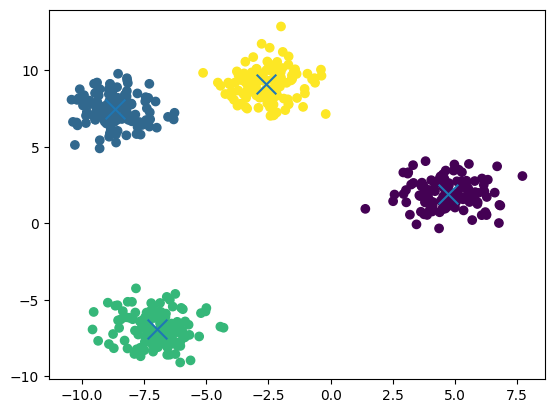

In [1]:
'''21  Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
scatter plot'''

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200)
plt.show()

In [2]:
'''22.Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
predicted labels'''

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

print(labels[:10])


[1 1 1 1 1 1 1 1 1 1]


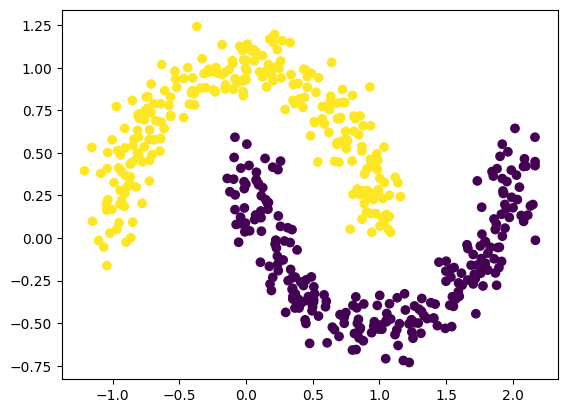

In [3]:
'''23.Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot'''

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

outliers = labels == -1
clusters = labels != -1

plt.scatter(X[clusters, 0], X[clusters, 1], c=labels[clusters])
plt.scatter(X[outliers, 0], X[outliers, 1], color='red')
plt.show()


In [4]:
'''24 Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster '''

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))


{np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


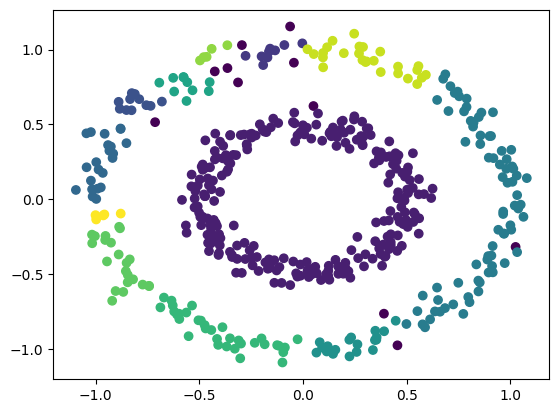

In [5]:
'''25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result'''

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

db = DBSCAN(eps=0.1, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()


In [6]:
'''26.Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
centroids'''

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = data.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

print(kmeans.cluster_centers_)


[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


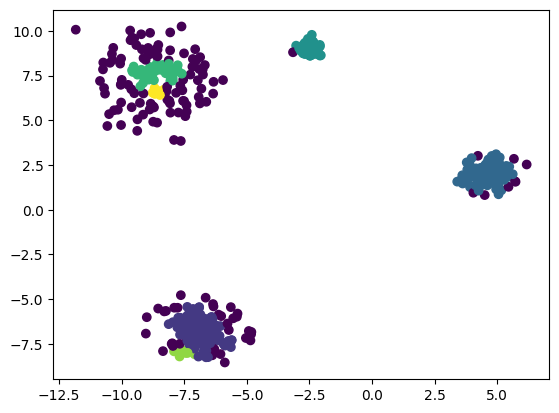

In [7]:
'''27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
DBSCAN'''

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=600,
                  centers=4,
                  cluster_std=[0.2, 0.5, 0.8, 1.2],
                  random_state=42)

db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()


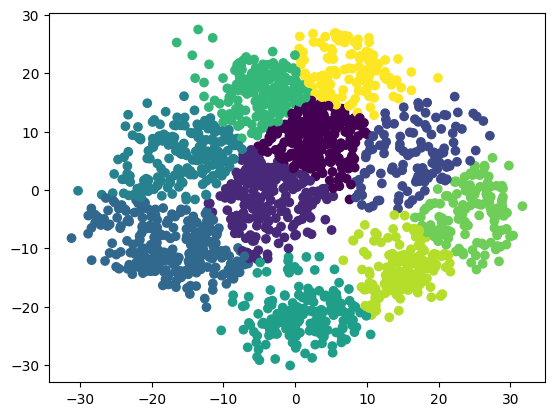

In [8]:
'''28 Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means'''

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_2d)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels)
plt.show()


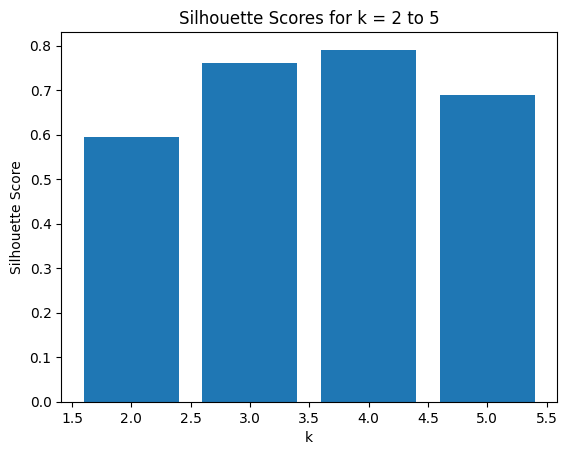

In [9]:
'''29.  Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart'''

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=4, random_state=42)

scores = []
ks = [2, 3, 4, 5]

for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.bar(ks, scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k = 2 to 5")
plt.show()


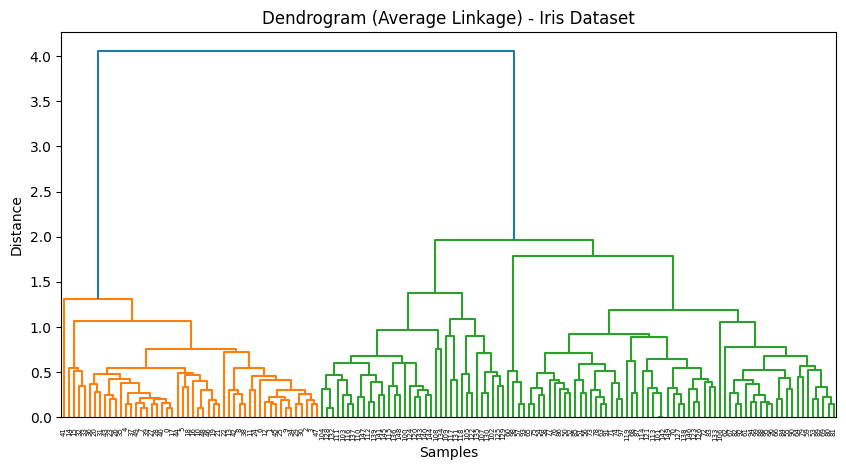

In [10]:
'''30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage'''

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

Z = linkage(X, method='average')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram (Average Linkage) - Iris Dataset")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


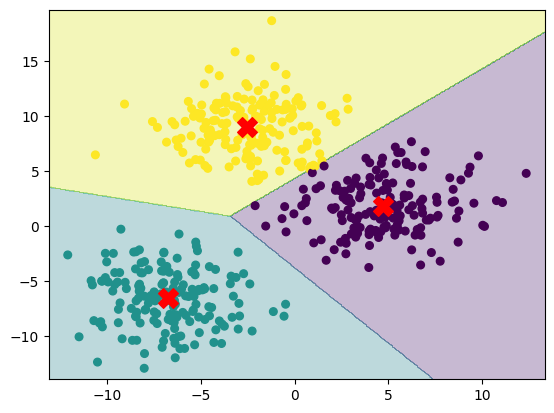

In [11]:
'''30.Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
decision boundarie'''
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=500, centers=3, cluster_std=2.5, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.show()


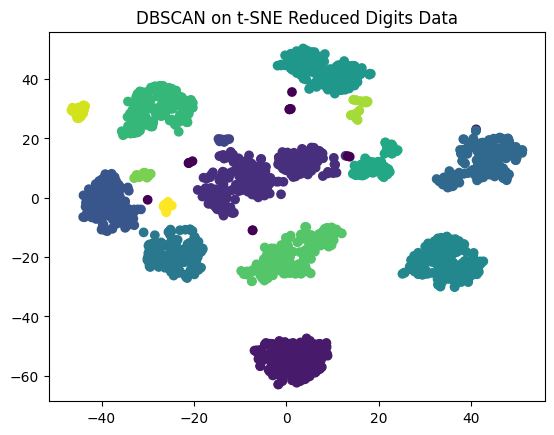

In [12]:
'''32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results'''

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

db = DBSCAN(eps=3, min_samples=5)
labels = db.fit_predict(X_2d)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels)
plt.title("DBSCAN on t-SNE Reduced Digits Data")
plt.show()


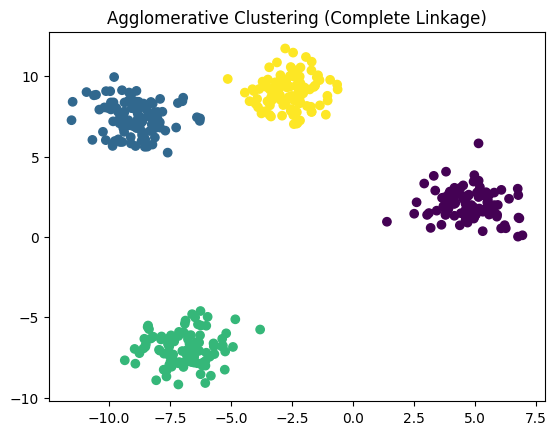

In [13]:
'''33.  Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
the result'''

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=400, centers=4, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


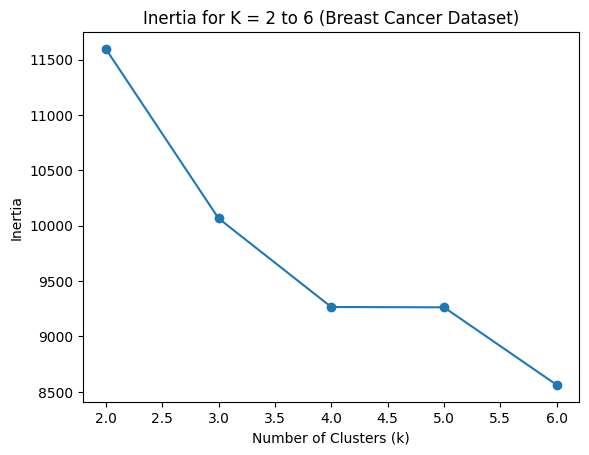

In [14]:
'''34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
line plot'''

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
ks = range(2, 7)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(ks, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Inertia for K = 2 to 6 (Breast Cancer Dataset)")
plt.show()


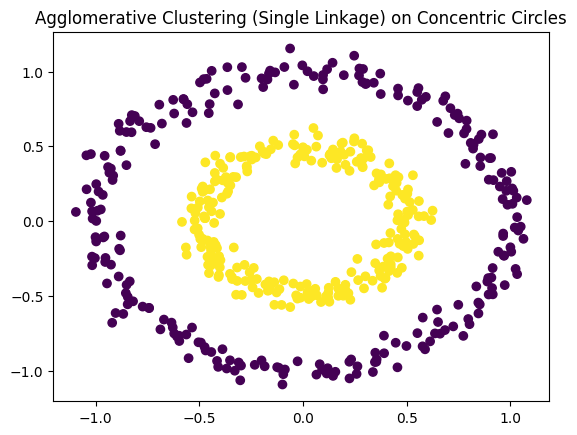

In [15]:
'''35.Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
single linkage'''

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative Clustering (Single Linkage) on Concentric Circles")
plt.show()


In [16]:
'''36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise'''

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X_scaled)

unique_clusters = set(labels)
unique_clusters.discard(-1)

print("Number of clusters (excluding noise):", len(unique_clusters))


Number of clusters (excluding noise): 0


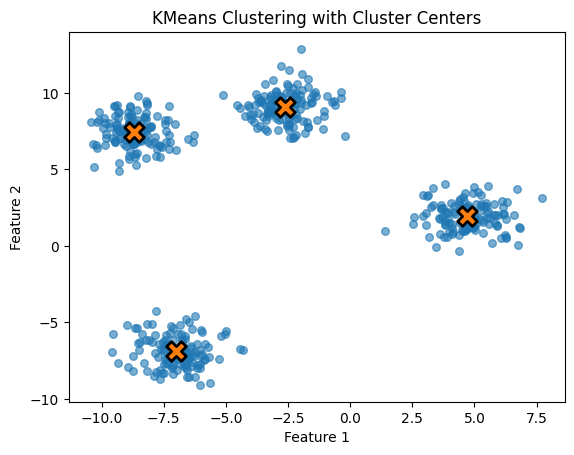

In [17]:
'''37.Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points'''
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, linewidths=2, edgecolors='black')

plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



In [18]:
'''38.Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise'''

from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np

data = load_iris()
X = data.data

db = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = db.labels_

noise_count = np.sum(labels == -1)
print("Number of noise samples:", noise_count)


Number of noise samples: 17


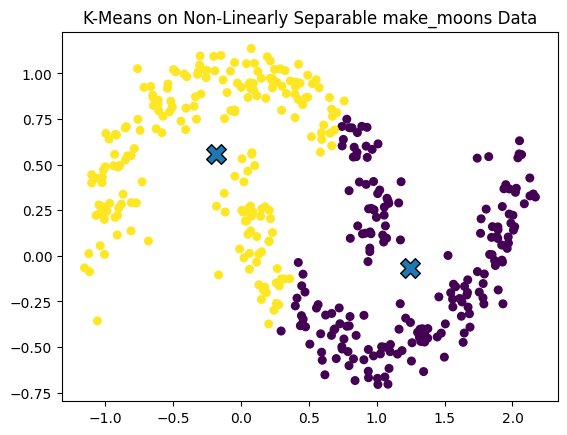

In [19]:
'''39.Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result'''

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=400, noise=0.1, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='X', s=200, edgecolors='black')

plt.title("K-Means on Non-Linearly Separable make_moons Data")
plt.show()


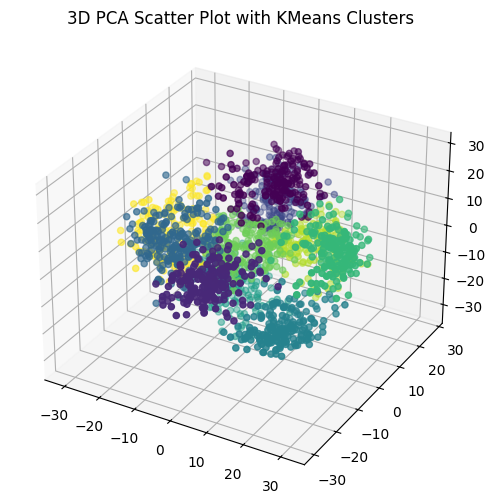

In [20]:
'''40.Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
scatter plot.'''

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, s=20)

ax.set_title("3D PCA Scatter Plot with KMeans Clusters")
plt.show()


In [21]:
'''41 Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering '''

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=600, centers=5, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.6667603739055007


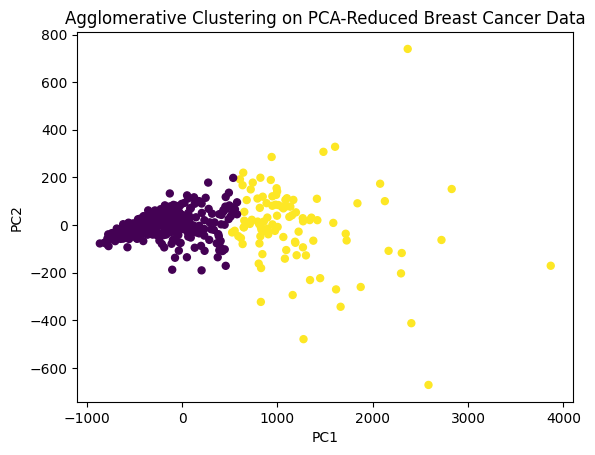

In [22]:
'''42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
Visualize in 2D'''

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=25)
plt.title("Agglomerative Clustering on PCA-Reduced Breast Cancer Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


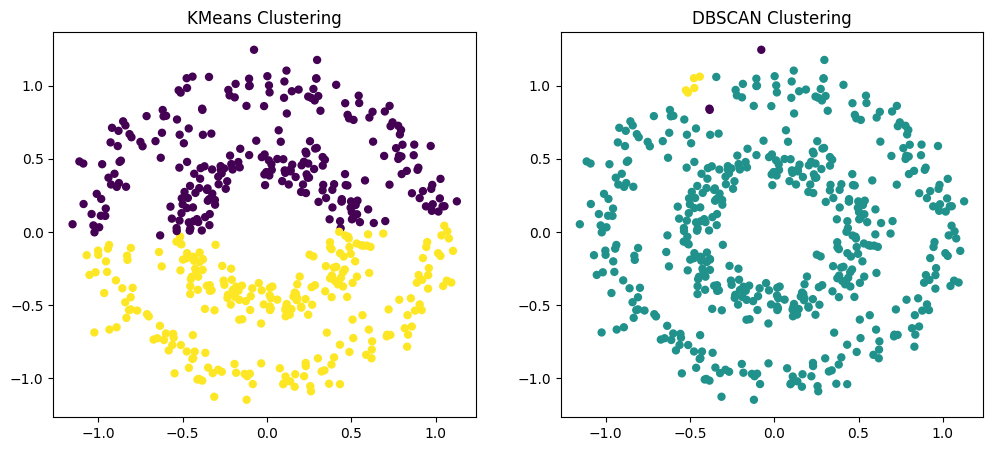

In [23]:
'''43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side'''

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=500, noise=0.08, factor=0.5, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=25)
plt.title("KMeans Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, s=25)
plt.title("DBSCAN Clustering")

plt.show()


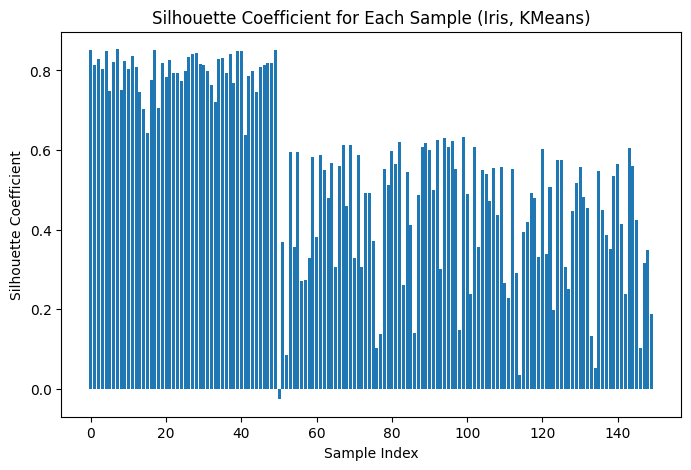

In [24]:
'''44.Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering'''

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

data = load_iris()
X = data.data

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

sil_values = silhouette_samples(X, labels)

plt.figure(figsize=(8, 5))
plt.bar(range(len(sil_values)), sil_values)
plt.title("Silhouette Coefficient for Each Sample (Iris, KMeans)")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.show()


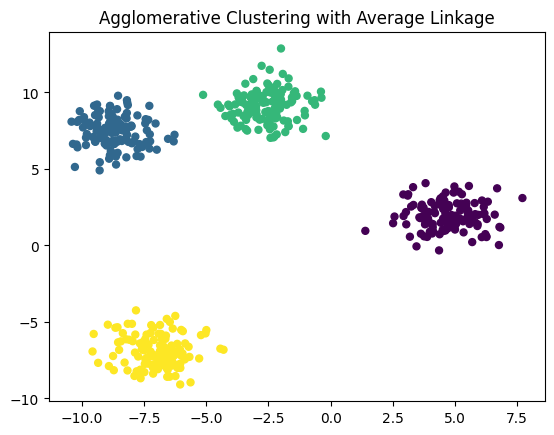

In [25]:
'''45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters'''

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=25)
plt.title("Agglomerative Clustering with Average Linkage")
plt.show()


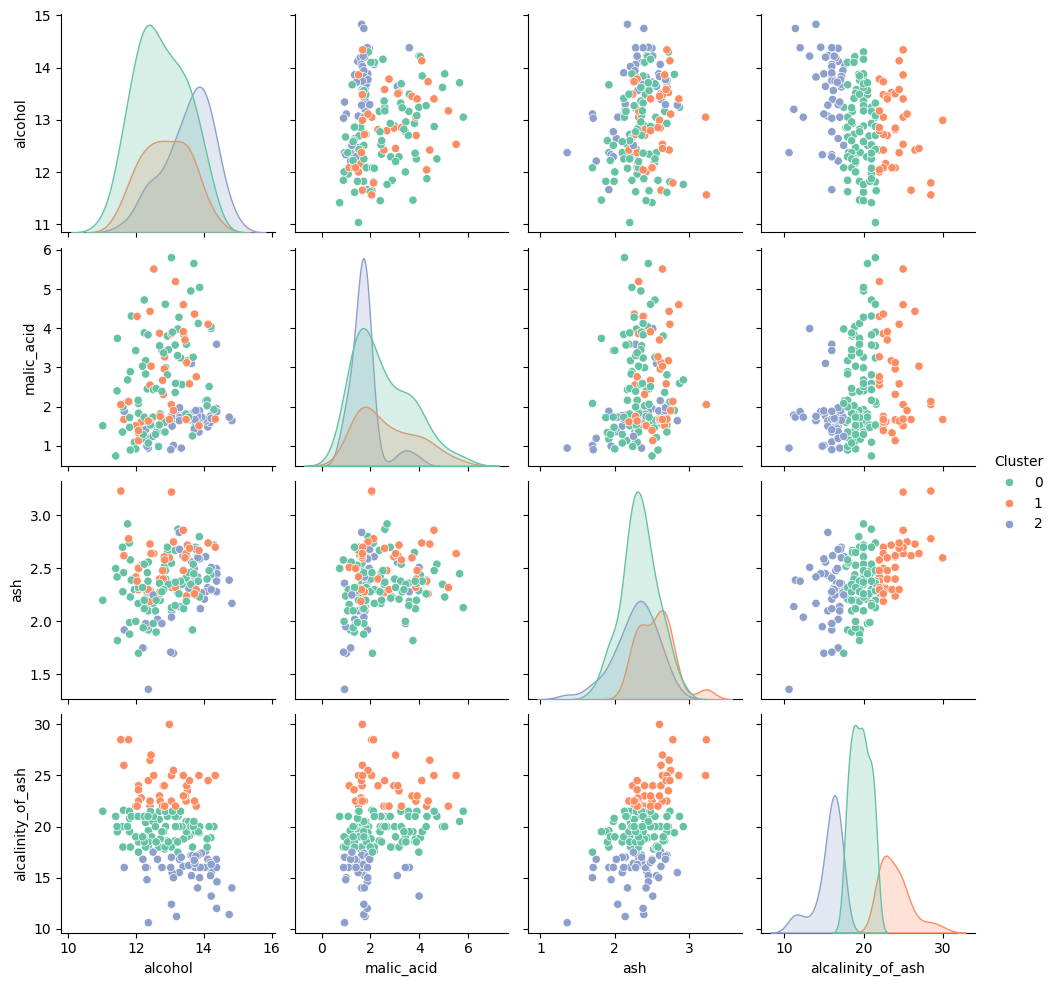

In [26]:
'''46.Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
features)'''

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = load_wine()
X = pd.DataFrame(data.data[:, :4], columns=data.feature_names[:4])

kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

sns.pairplot(X, hue='Cluster', palette='Set2')
plt.show()


In [27]:
'''47.Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count'''

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X, y = make_blobs(n_samples=500, centers=3, cluster_std=1.2, random_state=42)

dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)


Number of clusters: 3
Number of noise points: 9


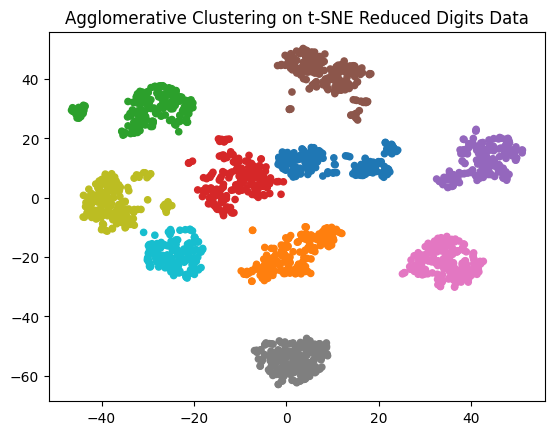

In [28]:
'''48.Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
clusters.'''

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, s=20, cmap='tab10')
plt.title("Agglomerative Clustering on t-SNE Reduced Digits Data")
plt.show()
